# SESSIONS 7 & 8 - Decision Making under Uncertainty

## 1. Generating Random Numbers from a Uniform Distribution

As discussed in the chapter, the RAND() function in Excel generates a random number between 0 and 1. The following Python code uses the random library to generate 500 random numbers between 0 and 1 and then plots a histogram of the numbers.

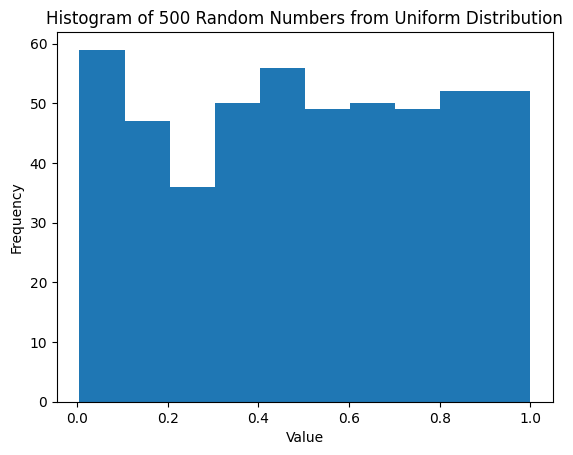

In [1]:
import random
import matplotlib.pyplot as plt

# Generate 500 random numbers between 0 and 1
random_numbers = [random.random() for _ in range(500)]

# Plot a histogram of the random numbers
plt.hist(random_numbers, bins=10)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of 500 Random Numbers from Uniform Distribution")
plt.show()

## 2. Generating Random Numbers from a Discrete Distribution

The following Python code generates random numbers from a discrete distribution with possible values 50 and 100, and corresponding probabilities 0.7 and 0.3.

In [3]:
import random

# Define the possible values and their probabilities
values = [50, 100]
probabilities = [0.4,0.6]

# Generate a list of 1000 random numbers
random_numbers = random.choices(values, probabilities, k=1000)

# Count the occurrences of each value
counts = {value: random_numbers.count(value) for value in set(values)}

# Print the counts
print(counts)

{50: 405, 100: 595}


## 3. Simulating a Supermarket

The following Python code simulates the operations of a supermarket. In this simulation, we consider the number of customers arriving at the supermarket and the number of open registers. The simulation calculates the average waiting time for customers.

In [8]:
import random

# Simulation parameters
num_customers = 10000
num_registers = 5
service_time_mean = 30  # Average service time per customer
arrival_rate = 10  # Average number of customers arriving per unit time

# Initialize simulation variables
waiting_times = []
current_time = 0
registers = [0] * num_registers  # Registers are initially idle
customer_queue = []

# Simulate customer arrivals and service
for _ in range(num_customers):
    current_time += random.expovariate(1/arrival_rate)  # Time until next arrival
    customer_queue.append(current_time)  # Customer joins the queue

    # Assign customers to available registers
    for i in range(num_registers):
        if registers[i] <= current_time and customer_queue:
            arrival_time = customer_queue.pop(0)
            wait_time = registers[i] - arrival_time if registers[i] > arrival_time else 0
            waiting_times.append(wait_time)
            registers[i] = current_time + random.expovariate(1/service_time_mean)  # Register becomes busy

# Calculate average waiting time
average_waiting_time = sum(waiting_times) / len(waiting_times) if waiting_times else 0
print(f"Average waiting time: {average_waiting_time:.10f} time units")

Average waiting time: 8.7973438790 time units


# 4. Practical Case: Option Valuation with Python

## Monte Carlo Option Valuation:
* Demonstrating Monte Carlo simulation for option pricing.
* Estimating stock price at the maturity of the option.
* Calculating the payoff value of the option.
* Discounting at the risk-free rate.

In [9]:
import numpy as np
import scipy.stats as si

def monte_carlo_option_price(S0, K, T, r, sigma, num_simulations):
    """
    Calculates the price of a European call option using Monte Carlo simulation.

    Args:
        S0: Current stock price.
        K: Strike price.
        T: Time to maturity in years.
        r: Risk-free interest rate.
        sigma: Volatility of the stock.
        num_simulations: Number of simulation trials.

    Returns:
        The estimated price of the call option.
    """
    # Generate random samples from a standard normal distribution
    Z = np.random.standard_normal(num_simulations)
    # Calculate the stock price at maturity (ST) for each simulation
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    # Calculate the payoff of the call option for each simulation
    payoff = np.maximum(ST - K, 0)
    # Discount the payoffs back to present value
    PV = np.exp(-r * T) * payoff
    # Estimate the option price as the average of the present values
    option_price = np.mean(PV)
    return option_price

# Example parameters
S0 = 10  # Current stock price
K = 8   # Strike price
T = 1   # Time to maturity in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
num_simulations = 10000  # Number of simulations

# Calculate the option price
call_price = monte_carlo_option_price(S0, K, T, r, sigma, num_simulations)
print("Estimated Call Option Price:", call_price)

Estimated Call Option Price: 2.4661511724075056
